# EPR-type entanglement of NDPA

$$\def \lk{\left(}
\def \rk{\right)}
\def \frop#1{\hat{\tilde{#1}}}
\def\thetap{\theta^\prime}
\def\ul#1{\underline{#1}}
\def\frvecop#1{\hat{\tilde{\underline{#1}}}}
\def\dul#1{\underline{\underline{#1}}}
\def\frmat#1{\tilde{\dul{#1}}}
\def\lk{\left(}
\def\rk{\right)}
\def\lka{\left\{}
\def\rka{\right\}}
\def\lsz{\left[}
\def\rsz{\right]}
\def\bra{\left\langle}
\def\ket{\right\rangle}$$

## Intracavity field
$$\begin{align}
\frop{a} &= \lk\nu\dul{\mathbb{1}} - \dul{\Delta} + i\sqrt{2\pi}\frmat{f}\rk^{-1}\frop{B} = 
\frmat{N}\ \frop{B} \\
\dul{\Delta} &= \left(\begin{matrix} 
(-i\kappa_a+\Delta) & 0 & ig & i\epsilon \\
0 & (-i\kappa_a-\Delta) & i\epsilon^* & ig^* \\
-ig^* & i\epsilon & (-i\kappa_b-\Delta) & 0 \\
i\epsilon^* & -ig & 0 & (-i\kappa_b+\Delta)\end{matrix}\right)\\
\sqrt{2\pi}\frmat{f} &= diag \left(k_ae^{i(\nu\tau_a+\phi_a)},k_ae^{i(\nu\tau_a-\phi_a)},k_be^{i(\nu\tau_b+\phi_b)},k_be^{i(\nu\tau_b-\phi_b)}\right) =\\
& =diag \left(k_a,k_a,k_b,k_b\right)\cdot diag \left(e^{i(\nu\tau_a+\phi_a)},e^{i(\nu\tau_a-\phi_a)},e^{i(\nu\tau_b+\phi_b)},e^{i(\nu\tau_b-\phi_b)}\right)=\\
&=\dul{K}\,\frmat{f}_N
\end{align}$$

### Input field
$$\begin{align}
\frvecop{B} &= -i\lsz\lk\dul{\kappa}_1+\sqrt{2\pi}\, \dul{\kappa}_2\,\dul{L}_2\,\frmat{f}_N\rk\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\frvecop{\xi} \rsz = -i\lk\frmat{A}_1\,\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\,\frvecop{\xi}\rk\\
\dul{\kappa}_n &= diag(\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,b}},\sqrt{2\kappa_{n,b}})\\
\dul{L}_1 &= diag(\sqrt{L_a},\sqrt{L_a},\sqrt{L_b},\sqrt{L_b})\\
\dul{L}_2 &= diag(\sqrt{1-L_a},\sqrt{1-L_a},\sqrt{1-L_b},\sqrt{1-L_b})\\
\frmat{A}_1 &= diag\lk\alpha_1(\nu),\alpha^*_1(-\nu),\beta_1(\nu),\beta^*_1(-\nu)\rk \text{ where, } \alpha_1(\nu) = \frac{1}{\sqrt{2\kappa_{1,a}}}\lk 2\kappa_{1,a}+k_a e^{i\lk\nu\tau_a+\phi_a\rk}\rk
\end{align}$$
where $\frvecop{a}_{1,in}$ and $\frvecop{\xi}$ represent vacuum fields.

Therefore, the intracavity field has the following form:
$$\frvecop{a} = -i\frmat{N}\lk\frmat{A}_1\,\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\,\frvecop{\xi}\rk$$

In [1]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)

In [2]:
from sympy.assumptions.assume import global_assumptions
from sympy.solvers.solvers import check_assumptions

dma,dmb,dpa,dpb,eps,Lab,Lba = \
symbols('d_-a d_-b d_+a d_+b \epsilon \Lambda_ab \Lambda_ba')

ka,kb,ta,tb,phia,phib,La,Lb,kap1a,kap2a,kap1b,kap2b,Del =\
symbols('k_a k_b \\tau_a \\tau_b \phi_a \phi_b L_a,L_b,\kappa_1a \kappa_2a \kappa_1b \kappa_2b \Delta')

xia,xida,xib,xidb,a1in,ad1in,b1in,bd1in,nu = \
symbols('\\xi_a \\xi^+_a \\xi_b \\xi^+_b a_1in a^+_1in b_1in b^+_1in \\nu')

taua,taub = symbols('\\tau_a \\tau_b')

alpha1, beta1 = symbols('\\alpha_1 \\beta_1')

kap1 = diag(sqrt(2*kap1a),sqrt(2*kap1a),sqrt(2*kap1b),sqrt(2*kap1b))
kap2 = diag(sqrt(2*kap2a),sqrt(2*kap2a),sqrt(2*kap2b),sqrt(2*kap2b))
L1   = diag(sqrt(La),sqrt(La),sqrt(Lb),sqrt(Lb))
L2   = diag(sqrt(1-La),sqrt(1-La),sqrt(1-Lb),sqrt(1-Lb))
K    = diag(ka,ka,kb,kb)
ftil = diag(exp(I*(nu*ta+phia)),exp(I*(nu*ta-phia)),exp(I*(nu*tb+phib)),exp(I*(nu*tb-phib)))
ain  = Matrix([a1in,ad1in,b1in,bd1in])
xi   = Matrix([xia,xida,xib,xidb])

A    = -I*diag(alpha1,conjugate(alpha1),beta1,conjugate(beta1)) #A = -i*A1
S    = -I*kap2*L1                                               #S = -i*kappa2*L1

N    = I*Matrix([[dpb/Lba,0,0,eps/Lba],[0,dmb/Lab,conjugate(eps)/Lab,0],\
              [0,eps/Lab,dpa/Lab,0],[conjugate(eps)/Lba,0,0,dma/Lba]])

The input field B has the following form:

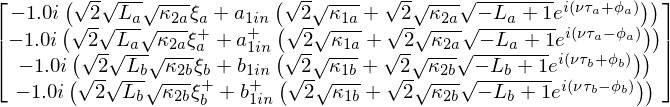

In [3]:
B    = -1j*((kap1+kap2*ftil*L2)*ain + kap2*L1*xi)
B

which is the same as (with the notation shown above)

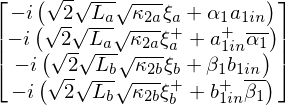

In [4]:
simplify(A*ain+S*xi)

### Intracavity field

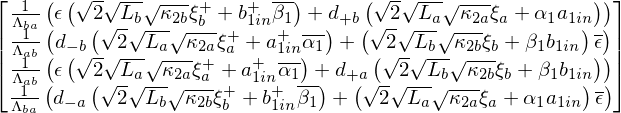

In [5]:
a = (N*(A*ain+S*xi))
simplify(a)

So we have the following equations for the intracavity field:
$$\begin{align}
\frop{a}(\nu) &= \frac{1}{\Lambda_{ba}(\nu)}\lsz d_{+b}(\nu) \alpha_1(\nu) \frop{a}_{1,in}(\nu)+\epsilon\beta_1^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{2\kappa_{2,a}L_a}d_{+b}(\nu)\frop{\xi}_a(\nu) +  \sqrt{2\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu) \rsz\\
\frop{a}^\dagger(-\nu) &=\frac{1}{\Lambda_{ab}(\nu)}\lsz d_{-b}(\nu) \alpha_1^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+\epsilon^*\beta_1(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{2\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}^\dagger_a(-\nu) +  \sqrt{2\kappa_{2,b}L_b}\epsilon^*\frop{\xi}_b(\nu) \rsz\\
\frop{b}(\nu) &=\frac{1}{\Lambda_{ab}(\nu)}\lsz \epsilon \alpha_1^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+d_{+a}(\nu)\beta_1(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{2\kappa_{2,b}L_b}d_{+a}(\nu)\frop{\xi}_b(\nu) +  \sqrt{2\kappa_{2,a}L_a}\epsilon\frop{\xi}^\dagger_a(-\nu) \rsz\\
\frop{b}^\dagger(-\nu) &=\frac{1}{\Lambda_{ba}(\nu)}\lsz \epsilon^* \alpha_1(\nu) \frop{a}_{1,in}(\nu)+d_{-a}(\nu)\beta_1^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{2\kappa_{2,b}L_b}d_{-a}(\nu)\frop{\xi}^\dagger_b(-\nu) +  \sqrt{2\kappa_{2,a}L_a}\epsilon^*\frop{\xi}_a(\nu) \rsz
\end{align}$$

## Output field
$$\begin{align}
\hat{\tilde{\underline{a}}}_{2,out} &= \hat{\tilde{\underline{a}}}_{2,in} + \dul{\kappa}_2\hat{\tilde{\underline{a}}} = \sqrt{2\pi}\dul{L}_2\frmat{f}_N\lk\frvecop{a}_{1,in}+\dul{\kappa}_1\frvecop{a}\rk + \dul{L}_1\frvecop{\xi}+\dul{\kappa}_2\hat{\tilde{\underline{a}}}=\\
&= \sqrt{2\pi}\dul{L}_2\frmat{f}_N\frvecop{a}_{1,in}+\dul{L}_1\frvecop{\xi}-i\lk\sqrt{2\pi}\dul{L}_2\frmat{f}_N\dul{\kappa}_1 + \dul{\kappa}_2\rk\frmat{N}\lk\frmat{A}_1\,\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\,\frvecop{\xi}\rk =\\
&= \lsz\sqrt{2\pi}\dul{L}_2\ \frmat{f}_N -i\lk\sqrt{2\pi}\dul{L}_2\ \frmat{f}_N\dul{\kappa}_1 + \dul{\kappa}_2\rk\frmat{N}\ \frmat{A}_1\rsz\frvecop{a}_{1,in}+\lsz\dul{\mathbb{1}}-i\lk\sqrt{2\pi}\dul{L}_2\ \frmat{f}_N\dul{\kappa}_1 + \dul{\kappa}_2\rk\frmat{N}\ \dul{\kappa}_2\rsz\dul{L}_1\frvecop{\xi}=\\
&=\frmat{O}_1\frvecop{a}_{1,in}+\frmat{O}_2\frvecop{\xi}
\end{align}$$

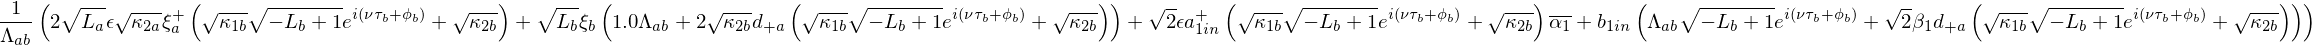

In [6]:
O1 = L2*ftil+(L2*ftil*kap1+kap2)*N*A
O2 = (np.identity(4)-I*(L2*ftil*kap1+kap2)*N*kap2)*L1
aout = O1*ain + O2*xi
simplify(aout[2])

Therefore the output fields have the following expressions:
$$\begin{align}
\frop{a}_{2,out}(\nu) &=  \overbrace{\lk \sqrt{1-L_a} e^{i\lk\nu\tau_a+\phi_a\rk}+\frac{d_{+b}(\nu)}{\Lambda_{ba}(\nu)}\alpha_1(\nu)\alpha_2(\nu)\rk}^{\frac{D_a(\nu)}{\Lambda_{ba}(\nu)}}\frop{a}_{1,in}(\nu)+\overbrace{\sqrt{L_a}\lk 1+\sqrt{2\kappa_{2,a}}\frac{d_{+b}(\nu)\alpha_2(\nu)}{\Lambda_{ba}}\rk}^{\frac{E_a(\nu)}{\Lambda_{ba}}}\frop{\xi}_a(\nu)+\\
&\quad+\epsilon\frac{\alpha_2(\nu)}{\Lambda_{ba}(\nu)}\lsz\lk\beta^*_1(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,b}L_b}\frop{\xi}^\dagger_b(-\nu)\rk\rsz=\\
&=\frac{1}{\Lambda_{ba}(\nu)}\lka D_a(\nu)\frop{a}_{1,in}(\nu)+E_a(\nu)\frop{\xi}_a(\nu)+\epsilon\alpha_2(\nu)\lsz\beta^*_1(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,b}L_b}\frop{\xi}^\dagger_b(-\nu)\rsz\rka\\
\frop{a}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ab}(\nu)}\lka D^*_a(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+E^*_a(-\nu)\frop{\xi}^\dagger_a(-\nu)+\epsilon^*\alpha^*_2(-\nu)\lsz\beta_1(\nu)\frop{b}_{1,in}(\nu)+\sqrt{2\kappa_{2,b}L_b}\frop{\xi}_b(\nu)\rsz\rka\\
\frop{b}_{2,out}(\nu)&= \frac{1}{\Lambda_{ab}(\nu)}\lka D_b(\nu)\frop{b}_{1,in}(\nu)+E_b(\nu)\frop{\xi}_b(\nu)+\epsilon\beta_2(\nu)\lsz\alpha^*_1(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,a}L_a}\frop{\xi}^\dagger_a(-\nu)\rsz\rka\\
\frop{b}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ba}(\nu)}\lka D^*_b(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+E^*_b(-\nu)\frop{\xi}^\dagger_b(-\nu)+\epsilon^*\beta^*_2(-\nu)\lsz\alpha_1(\nu)\frop{a}_{1,in}(\nu)+\sqrt{2\kappa_{2,a}L_a}\frop{\xi}_a(\nu)\rsz\rka
\end{align}$$

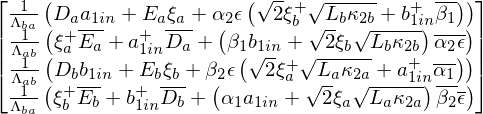

In [7]:
alpha1,beta1,alpha2,beta2,Da,Db,Ea,Eb = symbols('\\alpha_1 \\beta_1 \\alpha_2 \\beta_2 D_a D_b E_a E_b')
thetapa,thetapb,kapa,kapb = symbols('\\theta_pa \\theta_pb \kappa_a \kappa_b')
aout = Matrix([1/(Lba)*(Da*a1in+Ea*xia+alpha2*eps*(conjugate(beta1)*bd1in+sqrt(2*kap2b*Lb)*xidb)),\
               1/(Lab)*(conjugate(Da)*ad1in+conjugate(Ea)*xida+\
                        conjugate(alpha2)*conjugate(eps)*(beta1*b1in+sqrt(2*kap2b*Lb)*xib)),\
               1/(Lab)*(Db*b1in+Eb*xib+beta2*eps*(conjugate(alpha1)*ad1in+sqrt(2*kap2a*La)*xida)),\
               1/(Lba)*(conjugate(Db)*bd1in+conjugate(Eb)*xidb+\
                        conjugate(beta2)*conjugate(eps)*(alpha1*a1in+sqrt(2*kap2a*La)*xia))])
aout

## Quadrature variances

The quadratures of the two modes are:
$$\begin{align}
\frop{X}_{\mu,\theta^\prime_\mu}&=\frac{1}{2}\lk\frop{\mu}e^{-i\thetap_\mu/2}+\frop{\mu}^\dagger e^{i\thetap_\mu/2}\rk\\
\frop{Y}_{\mu,\theta^\prime_\mu}&=\frac{1}{2i}\lk\frop{\mu}e^{-i\thetap_\mu/2}-\frop{\mu}^\dagger e^{i\thetap_\mu/2}\rk
\end{align}$$
The generalized quadratures involve both modes:
$$\begin{align}
\frop{X}^G_{\thetap} &= \lk \frop{X}_{a,\thetap_a}+\frop{X}_{b,\thetap_b}\rk\\
\frop{Y}^G_{\thetap} &= \lk \frop{Y}_{a,\thetap_a}- \frop{Y}_{b,\thetap_b}\rk
\end{align}$$
For two-party, two-mode entanglement, the following condition must be satisfied for separability of any CV state (PRL 84:2722 (2000)):
$$\left\langle\lsz\Delta\frop{X}^G_{\thetap}\rsz^2\right\rangle+\left\langle\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2\right\rangle\ge \left|\left\langle\lsz\frop{X}_{a,\thetap_a},\frop{Y}_{a,\thetap_a}\rsz\right\rangle\right|+\left|\left\langle\lsz\frop{X}_{b,\thetap_b},\frop{Y}_{b,\thetap_b}\rsz\right\rangle\right|=1$$



$$\begin{align}
\left\langle\lsz\Delta\frop{X}^G_{\thetap}\rsz^2\right\rangle+\left\langle\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2\right\rangle=\\
=\frac{1}{4}\lka\left\langle\lk\frop{a}e^{-i\thetap_a/2}+\frop{a}^\dagger e^{i\thetap_a/2}+\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\lk\frop{a}e^{-i\thetap_a/2}+\frop{a}^\dagger e^{i\thetap_a/2}+\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\right\rangle-\right.\\
\left.-\left\langle\lk\frop{a}e^{-i\thetap_a/2}-\frop{a}^\dagger e^{i\thetap_a/2}-\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\lk\frop{a}e^{-i\thetap_a/2}-\frop{a}^\dagger e^{i\thetap_a/2}-\frop{b}e^{-i\thetap_b/2}+\frop{b}^\dagger e^{i\thetap_b/2}\rk\right\rangle\rka=\\
=\frac{1}{2}\lka\bra\frop{a}\frop{a}^\dagger\ket+\bra\frop{a}^\dagger\frop{a}\ket+\bra\frop{b}\frop{b}^\dagger\ket+\bra\frop{b}^\dagger\frop{b}\ket+\lk\bra\frop{a}\frop{b}\ket+\bra\frop{b}\frop{a}\ket\rk e^{-i\lk\thetap_a+\thetap_b\rk/2}+\lk\bra\frop{a}^\dagger\frop{b}^\dagger\ket+\bra\frop{b}^\dagger\frop{a}^\dagger\ket\rk e^{i\lk\thetap_a+\thetap_b\rk/2}\rka\\
\bra:\lsz\Delta\frop{X}^G_{\thetap}\rsz^2:\ket+\bra:\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2:\ket=\frac{1}{2}\lka\bra\frop{a}^\dagger(-\nu)\frop{a}(\nup)\ket+\bra\frop{a}^\dagger(-\nup)\frop{a}(\nu)\ket+\bra\frop{b}^\dagger(-\nu)\frop{b}(\nup)\ket+\bra\frop{b}^\dagger(-\nup)\frop{b}(\nu)\ket+\\
\lsz\bra\frop{a(\nu)}\frop{b(\nup)}\ket+\bra\frop{b(\nu)}\frop{a(\nup)}\ket\rsz e^{-i\lk\thetap_a+\thetap_b\rk/2}+\lsz\bra\frop{a}^\dagger(-\nu)\frop{b}^\dagger(-\nup)\ket+\bra\frop{b}^\dagger(-\nup)\frop{a}^\dagger(-\nu)\ket\rsz e^{i\lk\thetap_a+\thetap_b\rk/2}\rka
\end{align}$$

Calculated two-mode output quadrature variances. Terms in the expectation values, when vacuum state is suggested:
$$
\def\nup{\nu^\prime}
\begin{align}
\bra\frop{a}^\dagger(-\nu)\frop{a}\lk\nup\rk\ket&=\frac{|\epsilon|^2}{\Lambda_{ab}(\nu)\Lambda_{ba}(\nup)}\alpha_2^*(-\nu)\alpha_2
\lk\nup\rk\lk\beta_1(\nu)\beta_1^*\lk-\nup\rk+2L_b\kappa_{2,b}\rk\delta\lk\nu+\nup\rk=\\
&=|\epsilon|^2\frac{\left|\alpha_2(-\nu)\right|^2}{\left|\Lambda_{ab}(\nu)\right|^2}
\lk\left|\beta_1(\nu)\right|^2+2L_b\kappa_{2,b}\rk\delta\lk\nu+\nup\rk\\
\bra\frop{a}^\dagger(-\nup)\frop{a}\lk\nu\rk\ket&=\frac{|\epsilon|^2}{\Lambda_{ab}(\nup)\Lambda_{ba}(\nu)}\alpha_2^*(-\nup)\alpha_2
\lk\nu\rk\lk\beta_1(\nup)\beta_1^*\lk-\nu\rk+2L_b\kappa_{2,b}\rk\delta\lk\nu+\nup\rk=\\
&=|\epsilon|^2\frac{\left|\alpha_2(\nu)\right|^2}{\left|\Lambda_{ba}(\nu)\right|^2}
\lk\left|\beta_1(-\nu)\right|^2+2L_b\kappa_{2,b}\rk\delta\lk\nu+\nup\rk\\
\bra\frop{b}^\dagger(-\nu)\frop{b}\lk\nup\rk\ket&=|\epsilon|^2\frac{\left|\beta_2(-\nu)\right|^2}{\left|\Lambda_{ba}(\nu)\right|^2}
\lk\left|\alpha_1(\nu)\right|^2+2L_a\kappa_{2,a}\rk\delta\lk\nu+\nup\rk\\
\bra\frop{b}^\dagger(-\nup)\frop{b}\lk\nu\rk\ket&=|\epsilon|^2\frac{\left|\beta_2(\nu)\right|^2}{\left|\Lambda_{ab}(\nu)\right|^2}
\lk\left|\alpha_1(-\nu)\right|^2+2L_a\kappa_{2,a}\rk\delta\lk\nu+\nup\rk\\
\bra\frop{a}(\nu)\frop{b}\lk\nup\rk\ket&=\frac{\epsilon}{\Lambda_{ba}(\nu)\Lambda_{ab}\lk\nup\rk}\beta_2\lk\nup\rk
\lk D_a(\nu)\alpha_1^*\lk-\nup\rk+\sqrt{2L_a\kappa_{2,a}}E_a(\nu)\rk\delta\lk\nu+\nup\rk=\\
&=\epsilon\frac{\beta_2(-\nu)}{\left|\Lambda_{ba}(\nu)\right|^2}
\lk D_a(\nu)\alpha_1^*\lk\nu\rk+\sqrt{2L_a\kappa_{2,a}}E_a(\nu)\rk\delta\lk\nu+\nup\rk\\
\bra\frop{b}(\nu)\frop{a}\lk\nup\rk\ket&=\epsilon\frac{\alpha_2(-\nu)}{\left|\Lambda_{ab}(\nu)\right|^2}
\lk D_b(\nu)\beta_1^*\lk\nu\rk+\sqrt{2L_b\kappa_{2,b}}E_b(\nu)\rk\delta\lk\nu+\nup\rk\\
\bra\frop{a}^\dagger(-\nu)\frop{b}^\dagger\lk-\nup\rk\ket&=\frac{\epsilon^*}{\Lambda_{ab}(\nu)\Lambda_{ba}\lk\nup\rk}\alpha^*_2\lk-\nu\rk
\lk \beta_1(\nu) D^*_b\lk-\nup\rk+\sqrt{2L_b\kappa_{2,b}}E_b^*\lk-\nup\rk\rk\delta\lk\nu+\nup\rk=\\
&=\epsilon^*\frac{\alpha^*_2(-\nu)}{\left|\Lambda_{ab}(\nu)\right|^2}
\lk D^*_b(\nu)\beta_1\lk\nu\rk+\sqrt{2L_b\kappa_{2,b}}E_b^*(\nu)\rk\delta\lk\nu+\nup\rk=\\
&=\bra\frop{b}(\nu)\frop{a}\lk\nup\rk\ket^*\\
\bra\frop{b}^\dagger(-\nu)\frop{a}^\dagger\lk-\nup\rk\ket&=\epsilon^*\frac{\beta^*_2(-\nu)}{\left|\Lambda_{ba}(\nu)\right|^2}
\lk D^*_a(\nu)\alpha_1\lk\nu\rk+\sqrt{2L_a\kappa_{2,a}}E_a^*(\nu)\rk\delta\lk\nu+\nup\rk=\\
&=\bra\frop{a}(\nu)\frop{b}\lk\nup\rk\ket^*
\end{align}$$

The required expectation value:
$$\begin{align}
&\bra:\lk\lsz\Delta\frop{X}^G_{\thetap}\rsz^2+\lsz\Delta\frop{Y}^G_{\thetap}\rsz^2\rk:\ket = \\
&=|\epsilon|\lka\frac{1}{\left|\Lambda_{ab}(\nu)\right|^2}\lsz \Re\lk\overbrace{e^{i\lk\theta-\frac{\thetap_a+\thetap_b}{2}\rk}\alpha_2(-\nu)\lsz D_b(\nu)\beta_1^*(\nu)+\sqrt{2L_b\kappa_{2,b}}E_b(\nu)\rsz}^{M_{ba}(\nu)}\rk+\right.\right.\\
&\left.\left.+\overbrace{\frac{|\epsilon|}{2}\cdot\lk\left|\alpha_2(-\nu)\right|^2\lsz\left|\beta_1(\nu)\right|^2+2L_b\kappa_{2,b}\rsz+\left|\beta_2(\nu)\right|^2\lsz\left|\alpha_1(-\nu)\right|^2+2L_a\kappa_{2,a}\rsz\rk}^{N_{ba}(\nu)}\rsz\right.+\\
&\quad\quad +\left.\frac{1}{\left|\Lambda_{ba}(\nu)\right|^2}\lsz \Re\lk e^{i\lk\theta-\frac{\thetap_a+\thetap_b}{2}\rk}
\beta_2(-\nu)\lsz D_a(\nu)\alpha_1^*(\nu)+\sqrt{2L_a\kappa_{2,a}}E_a(\nu)\rsz\rk+\frac{|\epsilon|}{2}\cdot\lk\left|\beta_2(-\nu)\right|^2\lsz\left|\alpha_1(\nu)\right|^2+2L_a\kappa_{2,a}\rsz+\left|\alpha_2(\nu)\right|^2\lsz\left|\beta_1(-\nu)\right|^2+2L_b\kappa_{2,b}\rsz\rk\rsz\rka\delta\lk\nu+\nup\rk=\\
&=|\epsilon|\lka\frac{\Re\lk M_{ba}(\nu)\rk+N_{ba}(\nu)}{\left|\Lambda_{ab}(\nu)\right|^2}+\frac{\Re\lk M_{ab}(\nu)\rk+N_{ab}(\nu)}{\left|\Lambda_{ba}(\nu)\right|^2}\rka\delta\lk\nu+\nup\rk
\end{align}$$


## Numerical calculations

Here I set the appropriate parameters and calculate the general quadrature variance in the units of dB.

In [18]:
from pylab import *
import numpy as np

#function which determines the quadrature correlations of a NDPA for a set of parameters
def quadr_spec(kapa=20.,kapb=20.,dela=0.,ra=0.0000000001,rb=0.0000000001,kta=0.,ktb=0.,phia=0.,phib=0.,La=100.,Lb=100.,\
               theta=0,thetapa=-pi,thetapb=pi,x=1.,nui=-25.,nuf=25.,N=20):
    
    ### PARAMETERS ####
    #Most of the parameters are given without the constant pi or 2pi.
    kapa = kapa*2.*pi       #\kappa_a (overall coupling for mode a)
    kapb = kapb*2.*pi       #\kappa_b (overall coupling for mode b)
    theta = theta*pi        #\theta (coherent pump phase)
    thetapa = thetapa*pi    #\theta^\prime_a (local oscillator phase for mode a)
    thetapb = thetapb*pi    #\theta^\prime_b (local oscillator phase for mode b)
    phia = phia*pi          #\phi_a (overall phase shift for mode a)
    phib = phib*pi          #\phi_b (overall phase shift for mode b)
    N = N*1000 +1           #resolution of frequencies
    
    #Frequency range initialization (nui:min, nuf:max, N:number of points)
    nu = linspace(nui*2.*pi,nuf*2.*pi,N)
    
    #Parameters calculated from the input parameters
    eps = x*kapa*exp(1j*theta)                #\epsilon (the coherent pump amplitude)
    Del = kapa*dela                           #\Delta (detuning of modes a, same as for b but in the opposite direction)
    ta   = kta/kapa                           #\tau_a (time delay in mode a)
    tb   = ktb/kapb                           #\tau_b (time delay in mode b)
    kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
    kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
    kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
    kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)
    ka = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
    kb = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)
    
    ### EXPRESSIONS ###
    Ema = np.exp(1j*(-nu*ta+phia))
    Emb = np.exp(1j*(-nu*tb+phib))
    Epa = np.exp(1j*(nu*ta+phia))
    Epb = np.exp(1j*(nu*tb+phib))
    dma = kapa-1j*(nu-Del) + ka*Epa         #d_{-,a}(\nu)
    dmb = kapb-1j*(nu+Del) + kb*Epb         #d_{-,b}(\nu)
    dpa = kapa-1j*(nu+Del) + ka*conj(Ema)   #d_{+,a}(\nu)
    dpb = kapb-1j*(nu-Del) + kb*conj(Emb)   #d_{+,b}(\nu)
    Lab = abs(eps)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
    Lba = abs(eps)**2 - dpb*dma          #\Lambda_{ba}(\nu)
    
    alpha1p = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Epa   #\alpha_1(\nu)
    alpha2p = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Epa   #\alpha_2(\nu)
    beta1p  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Epb   #\beta_1(\nu)
    beta2p  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Epb   #\beta_2(\nu)
    alpha1m = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Ema   #\alpha_1(-\nu)
    alpha2m = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Ema   #\alpha_2(-\nu)
    beta1m  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Emb   #\beta_1(-\nu)
    beta2m  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Emb   #\beta_2(-\nu)
    
    Da  = sqrt(1-La/100.)*Lba*Epa+dpb*alpha1p*alpha2p
    Db  = sqrt(1-Lb/100.)*Lab*Epb+dpa*beta1p*beta2p
    Ea  = sqrt(La/100.)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
    Eb  = sqrt(Lb/100.)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
    Mba = exp(1j*(theta-(thetapa+thetapb)/2))*alpha2m*(Db*np.conj(beta1p)+sqrt(2*Lb/100.*kap2b)*Eb)
    Mab = exp(1j*(theta-(thetapa+thetapb)/2))*beta2m*(Da*np.conj(alpha1p)+sqrt(2*La/100.*kap2a)*Ea)
    Nba = abs(eps)/2.*(np.abs(alpha2m)**2*(np.abs(beta1p)**2+2*Lb/100.*kap2b)+\
                    np.abs(beta2p)**2*(np.abs(alpha1m)**2+2*La/100.*kap2a))
    Nab = abs(eps)/2.*(np.abs(beta2m)**2*(np.abs(alpha1p)**2+2*La/100.*kap2a)+\
                    np.abs(alpha2p)**2*(np.abs(beta1m)**2+2*Lb/100.*kap2b))
    
    ### CORRELATIONS ###
    ncorr = abs(eps)*(1/np.abs(Lab)**2*(np.real(Mba)+Nba)+1/np.abs(Lba)**2*(np.real(Mab)+Nab))   #(normalized)
    Sout  = 10*np.log10(1+ncorr)
    
    ### FIGURES ###
    #Correlations compared to the non-correlated case in dB
    
    fsfont = {'fontname':'FreeSerif'}
    
    figure(1)
    plot(nu/2/np.pi,Sout,linewidth=2.0)
    xlabel('$\\nu$ (MHz)',fontsize = 50.,**fsfont)
    ylabel('$S_{out,\\theta^\prime}(\\nu)$',fontsize = 50.,**fsfont)
    xticks(fontsize = 30.,**fsfont)
    yticks(fontsize = 30.,**fsfont)
    xlim(nui,nuf)
    #ylim(-15,0)
    grid(True)
#    show()
    
#   Denominator |\Lambda_{ab}(\nu)|^2 as a function of the frequency
    #figure(2)
    #plot(nu/2/np.pi,np.abs(Lab)**2,linewidth=2.0)
    #xlabel('$\\nu$(MHz)',fontsize = 20.)
    #ylabel('$\Lambda_{ab}(\\nu)(MHz^2)$',fontsize = 20.)
    #xlim(-10,0)
    #ylim(0,2*10**7)
    #grid(True)
#    show()

#   Corr
#    figure(2)
#    plot(nu/2/np.pi,ncorr,linewidth=2.0)
#    xlabel('$\\nu$(MHz)',fontsize = 20.)
#    ylabel('$\Lambda_{ab}(\\nu)(MHz^2)$',fontsize = 20.)
#    xlim(-10,-6)
    #ylim(0,2*10**7)
#    grid(True)
#    show()

#    figure(1)
#    plMba, = plot(nu/2/np.pi,np.real(Mba),linewidth=2.0,label="M_ba")
#    hold(True)
#    plNba, = plot(nu/2/np.pi,Nba,linewidth=2.0,label="N_ba")
#    plMab, = plot(nu/2/np.pi,np.real(Mab),linewidth=2.0,label="M_ab")
#    plNab, = plot(nu/2/np.pi,Nab,linewidth=2.0,label="N_ab")
#    xlabel('$\\nu$(MHz)',fontsize = 20.)
#    ylabel('$\Lambda_{ab}(\\nu)(MHz^2)$',fontsize = 20.)
#    xlim(nui,nuf)
#    legend(handles = [plMba,plNba,plMab,plNab])
#    grid(True)
#    show()

#    figure(2)
#    plMba, = plot(nu/2/np.pi,np.real(Db),linewidth=2.0,label="Db")
#    hold(True)
#    plNba, = plot(nu/2/np.pi,sqrt(2*La/100.*kap2a)*nu/nu,linewidth=2.0,label="sqrt")
#    plMab, = plot(nu/2/np.pi,np.imag(beta1p),linewidth=2.0,label="be_1p")
#    plNab, = plot(nu/2/np.pi,np.imag(Eb),linewidth=2.0,label="Eb")
#    xlabel('$\\nu$(MHz)',fontsize = 20.)
#    ylabel('$\Lambda_{ab}(\\nu)(MHz^2)$',fontsize = 20.)
#    xlim(nui,nuf)
#    legend(handles = [plMba,plNba,plMab,plNab])
#    grid(True)
#    show()
    
    print(ka/kapa)


1.0


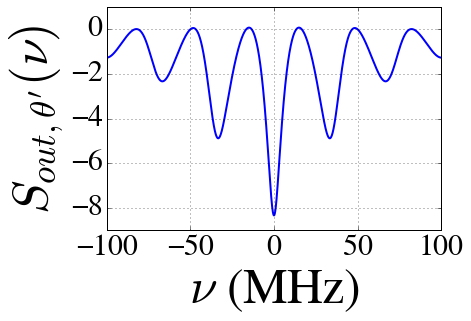

In [20]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

### SLIDERS ###
#input parameters:
kapa_slider    = widgets.FloatSlider(value = 10., min=0., max=20., step=1., description='$\kappa_a (2\pi)$')
kapb_slider    = widgets.FloatSlider(value = 2.5, min=0., max=20., step=1., description='$\kappa_b (2\pi)$')
dela_slider    = widgets.FloatSlider(value = 0.1, min=-4., max=4., step=0.01, description='$\Delta (\kappa_a)$')
ra_slider      = widgets.FloatSlider(value = 0.5, min=0., max=1., step=0.001, description='$\kappa_{1,a} (\kappa_a)$')
rb_slider      = widgets.FloatSlider(value = 0.5, min=0., max=1., step=0.001, description='$\kappa_{1,b} (\kappa_b)$')
kta_slider     = widgets.FloatSlider(value = 3, min=0., max=10., step=0.001, description='$\kappa_{a}\\tau_a$')
ktb_slider     = widgets.FloatSlider(value = 0, min=0., max=10., step=0.001, description='$\kappa_{b}\\tau_b$')
phia_slider    = widgets.FloatSlider(value = 0.03, min=0., max=2., step=0.01, description='$\phi_a (\pi)$')
phib_slider    = widgets.FloatSlider(value = 0, min=0., max=2., step=0.01, description='$\phi_b (\pi)$')
La_slider      = widgets.FloatSlider(value = 10., min=0., max=100., step=1., description='$L_a (\%)$')
Lb_slider      = widgets.FloatSlider(value = 10., min=0., max=100., step=1., description='$L_b (\%)$')
theta_slider   = widgets.FloatSlider(value = 1., min=-1., max=1., step=0.01, description='$\\theta (\pi)$')
thetapa_slider = widgets.FloatSlider(value = 0., min=-1., max=1., step=0.01, description='$\\theta^\prime_a (\pi)$')
thetapb_slider = widgets.FloatSlider(value = 0., min=-1., max=1., step=0.01, description='$\\theta^\prime_b (\pi)$')
x_slider       = widgets.FloatSlider(value = 0.5, min=0., max=5., step=0.01, description='$|\epsilon| (\kappa)$')
nui_fill       = widgets.FloatText(value=-25., description='Frequency min $(2\pi)$')
nuf_fill       = widgets.FloatText(value=25., description='Frequency max $(2\pi)$')
N_fill         = widgets.IntText(value=50., description='Resolution $\left(10^3 \\right)$')

#interactive setup
w = interactive(quadr_spec,kapa=kapa_slider,kapb=kapb_slider,dela=dela_slider,\
                        ra = ra_slider,rb = rb_slider,kta = kta_slider,ktb = ktb_slider,\
                        phia = phia_slider,phib = phib_slider,La = La_slider,Lb = Lb_slider,\
                        theta = theta_slider,thetapa = thetapa_slider,thetapb = thetapb_slider,x = x_slider,\
                        nui = nui_fill, nuf = nuf_fill, N = N_fill
                       )
#show sliders
display(w)

In [6]:
fsfont = {'fontname':'FreeSerif'}
quadr_spec(10.,2.5,0.1,0.5,0.75,4.65,0.403,0.,0.04,10.,10.,\
               1,0,0,0.4,-25.,25.,20)
show()


12.9054087215


/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:65: RuntimeWarning: invalid value encountered in log10


In [ ]:
plt.subplot(1,3,1)
plt.title('(a) $\Delta = 0$',fontsize = 30.0,**fsfont)
quadr_spec(10.,2.5,0.0,0.00001,0.00001,0.,0.,0,0,0.,0.,\
               1,0,0,0.5,-25.,25.,200)
plt.subplot(1,3,2)
plt.title('(b) $\Delta = 0.4\kappa_a$',fontsize = 30.0,**fsfont)
quadr_spec(10.,2.5,0.4,0.00001,0.00001,0.,0.,0,0,0.,0.,\
               1,0,0,0.5,-25.,25.,200)
plt.subplot(1,3,3)
plt.title('(c) $\Delta = 0.8\kappa_a$',fontsize = 30.0,**fsfont)
quadr_spec(10.,2.5,0.8,0.00001,0.00001,0.,0.,0,0,0.,0.,\
               1,0,0,0.5,-25.,25.,200)
plt.show()

### Comparison with existing literature

* P. Drummond, M. Reid, PRA **41** 3930 (1990)

  It uses operators rotating with different frequencies. In our case they are in the frame rotating by $\omega_p/2$ (see equation 2.12). BUT:
  - symmetric spectrum
  - only max 50% squeezing if degenerate frequencies with different polarization
  
  
* Z. Y. Ou, S. F. Pereira, and H. J. Kimble, Appl.Phys.B **55** 265 (1992)
  
  Good agreement of analytical results, when there is no feedback ($\kappa_a=\kappa_b=\kappa_{2,a}=\kappa_{2,b}=\frac{\gamma}{2}$ with $L_a=L_b=1$ and $\kappa_{1,a}=\kappa_{1,b}=0$)

## Stability analysis


In order to determine the stability of the system, the equation of motion can be rearranged in the following way:
\begin{align}
\frac{d}{dt}\ul{X} &= -\dul{\Delta}_X\ul{X}(t)-\dul{K}\,\dul{\Phi}\,\ul{X}_\tau(t)\\
\ul{X}(t) &= \lka X_{a,\theta}(t),Y_{a,\theta}(t),X_{b,\theta}(t),Y_{b,\theta}(t)\rka\\
\dul{\Delta}_X &= \left(\begin{matrix} 
\kappa_a & -\Delta & -|\epsilon| & 0 \\
\Delta & \kappa_a & 0 & |\epsilon| \\
-|\epsilon| & 0 & \kappa_b & \Delta \\
0 & |\epsilon| & -\Delta & \kappa_b\end{matrix}\right)\\
\ul{X}_\tau(t) &= \lka X_{a,\theta}(t-\tau_a),Y_{a,\theta}(t-\tau_a),X_{b,\theta}(t-\tau_b),Y_{b,\theta}(t-\tau_b)\rka\\
\dul{\Phi} &=\left(\begin{matrix} 
\cos{\phi_a} & -\sin{\phi_a} & 0 & 0 \\
\sin{\phi_a} & \cos{\phi_a} & 0 & 0 \\
0 & 0 & \cos{\phi_b} & -\sin{\phi_b} \\
0 & 0 & \sin{\phi_b} & \cos{\phi_b}\end{matrix}\right)
\end{align}

The behaviour close to the steady states can be described by suggesting exponential time-evolution $(X_i(t) = X_i(0)e^{\lambda t},Y_i(t) = Y_i(0)e^{\lambda t})$. Then the following should be satisfied:

\begin{align}
\left(\begin{matrix} 
\overbrace{\lk\lambda+\kappa_a+k_a\cos{\phi_a}e^{-\lambda\tau_a}\rk}^{R_a(\nu)} & -\overbrace{\lk\Delta+k_a\sin{\phi_a}e^{-\lambda\tau_a}\rk}^{I_a(\nu)} & -|\epsilon| & 0 \\
\lk\Delta+k_a\sin{\phi_a}e^{-\lambda\tau_a}\rk & \lk\lambda+\kappa_a+k_a\cos{\phi_a}e^{-\lambda\tau_a}\rk & 0 & |\epsilon| \\
-|\epsilon| & 0 & \overbrace{\lk\lambda+\kappa_b+k_b\cos{\phi_b}e^{-\lambda\tau_b}\rk}^{R_b(\nu)} & \overbrace{\lk\Delta-k_b\sin{\phi_b}e^{-\lambda\tau_b}\rk}^{I_b(\nu)} \\
0 & |\epsilon| & -\lk\Delta-k_b\sin{\phi_b}e^{-\lambda\tau_b}\rk & \lk\lambda+\kappa_b+k_b\cos{\phi_b}e^{-\lambda\tau_b}\rk\end{matrix}\right)\,\left(\begin{matrix}\tilde{X}_a\\\tilde{Y}_a\\\tilde{X}_b\\\tilde{Y}_b \end{matrix}\right)=0
\end{align}

In [9]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)

Ra,Ia,Rb,Ib = symbols('R_a I_a R_b I_b')

Stab = Matrix([[Ra,-Ia,-eps,0],\
               [Ia,Ra,0,eps],\
              [-eps,0,Rb,Ib],\
              [0,eps,-Ib,Rb]])
factor(Stab.det())

In [10]:
eps

In [ ]:
    ## Stability ##
    def R1(lambr,lambi):
        return lambr+kappa+k*np.cos(phi)*np.cos(2*np.pi*lambi*tau)*np.exp(-lambr*tau)
    def I1(lambr,lambi):
        return 2*np.pi*lambi-k*np.cos(phi)*np.sin(2*np.pi*lambi*tau)*np.exp(-lambr*tau)
    def R2(lambr,lambi):
        return Delta+k*np.sin(phi)*np.cos(2*np.pi*lambi*tau)*np.exp(-lambr*tau)
    def I2(lambr,lambi):
        return k*np.sin(phi)*np.sin(2*np.pi*lambi*tau)*np.exp(-lambr*tau)
    def equation(l):
        equations = [R1(l[0],l[1])**2-I1(l[0],l[1])**2-eps**2+R2(l[0],l[1])**2-I2(l[0],l[1])**2]
        equations.append(R1(l[0],l[1])*I1(l[0],l[1])+R2(l[0],l[1])*I2(l[0],l[1]))
        return equations

    lr = np.linspace(-20,20,100)
    li = np.linspace(-40,40,100)

    lr,li = np.meshgrid(lr,li)
    
    lamb = np.zeros(2)
    lamb = fsolve(equation,[0,6])
    lambr = np.array([lamb[0],lamb[0]])
    lambi = np.array([lamb[1],-lamb[1]])    
    
    fig = plt.figure()
 
    contour(lr,li,(R1(lr,li)**2-I1(lr,li)**2-eps**2+R2(lr,li)**2-I2(lr,li)**2),[0],colors='b')
    hold(True)
    contour(lr,li,(R1(lr,li)*I1(lr,li)+R2(lr,li)*I2(lr,li)),[0],colors='g')
    contour(lr,li,lr,[0],colors='grey',linestyles='dashed')
    plot(lambr,lambi,'o',color = 'r')
    grid(True)
    set_xlim(-20,20)
    set_xlabel('$\lambda_r (MHz)$')
    set_ylabel('$\lambda_i (MHz)$')
    xaxis.set_label_coords(1.3, -0.0015)
    yaxis.set_label_coords(-0.0015,1.3)